In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from tabulate import tabulate
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
from gmplot import gmplot
import time
import folium
from IPython.display import display
from IPython.display import display, HTML
import random 




### DATA INFO

In [2]:
# Load the dataset
file_path = '2023_Walk___Bike_Count_Data.csv'
df = pd.read_csv(file_path)

# Step 1: Display basic info and statistics
dataset_info = df.info()
basic_stats = df.describe()

# Display the basic info and statistics
print(dataset_info)
print(basic_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INDEX                       79 non-null     object 
 1   Street Name                 79 non-null     object 
 2   Limit 1                     79 non-null     object 
 3   Limit 2                     79 non-null     object 
 4   Full Location Names 2023    79 non-null     object 
 5   Facility Type               48 non-null     object 
 6   Ped_Total                   79 non-null     int64  
 7   Ped_Female_Total            79 non-null     int64  
 8   Ped_Male_Total              79 non-null     int64  
 9   Ped_MobAssist_Total         79 non-null     int64  
 10  Ped_Stroller_Total          79 non-null     int64  
 11  Ped_Weekday_Total           79 non-null     int64  
 12  Ped_Weekday_Female          79 non-null     int64  
 13  Ped_Weekday_Male            79 non-nu

### CHECKING MISSING NUMBERS

In [3]:
# Step 2: Check for missing values
missing_values = df.isnull().sum()

# Display missing values per column
print(missing_values)


INDEX                       0
Street Name                 0
Limit 1                     0
Limit 2                     0
Full Location Names 2023    0
                           ..
Other_Weekend_Female        2
Other_Weekend_Male          2
Other_Weekend_Sidewalk      2
Other_Weekend_ContraFlow    2
Other_Weekend_Helmet        2
Length: 75, dtype: int64


### Calculating the total number of male and female pedestrians on weekdays and weekends

In [4]:


total_weekday_female = df['Ped_Weekday_Female'].sum()
total_weekday_male = df['Ped_Weekday_Male'].sum()

total_weekend_female = df['Ped_Weekend_Female'].sum()
total_weekend_male = df['Ped_Weekend_Male'].sum()

# Print the results
print(f"Total weekday female pedestrians: {total_weekday_female}")
print(f"Total weekday male pedestrians: {total_weekday_male}")
print(f"Total weekend female pedestrians: {total_weekend_female}")
print(f"Total weekend male pedestrians: {total_weekend_male}")


Total weekday female pedestrians: 24048
Total weekday male pedestrians: 34580
Total weekend female pedestrians: 7724.0
Total weekend male pedestrians: 14354.0


### Data: total number of male and female pedestrians on weekdays and weekends

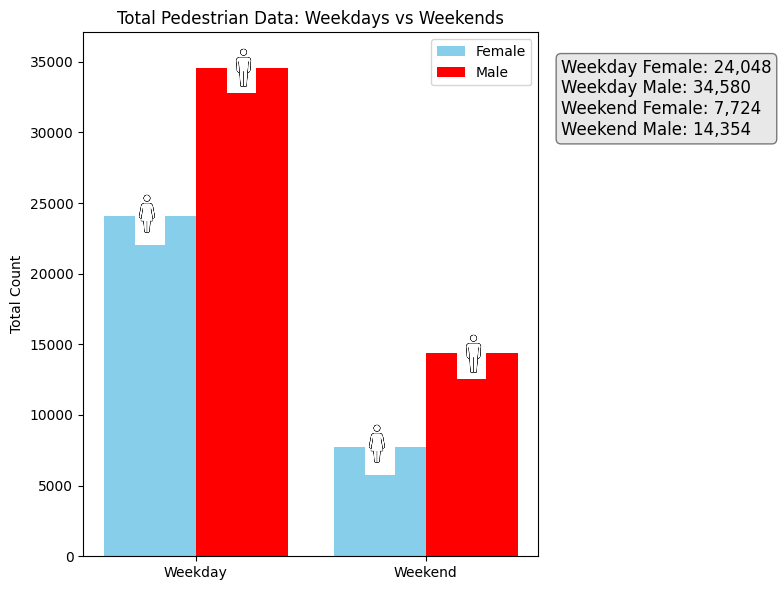

In [5]:

labels = ['Weekday', 'Weekend']
female_data = [total_weekday_female, total_weekend_female]
male_data = [total_weekday_male, total_weekend_male]

x = np.arange(len(labels))  # Label locations
width = 0.40  # Width of bars

# Loading the icons
female_icon_path = 'imageprint2.png'
male_icon_path = 'imageprint1.png'

female_icon = plt.imread(female_icon_path)
male_icon = plt.imread(male_icon_path)

# Function to add icons on top of bars
def add_image(icon, ax, x, y, zoom=0.2):
    imagebox = OffsetImage(icon, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting bars for female and male pedestrians
female_bars = ax.bar(x - width/2, female_data, width, label='Female', color='skyblue')
male_bars = ax.bar(x + width/2, male_data, width, label='Male', color='red')

# Adding icons on top of bars
for i in range(len(female_data)):
    add_image(female_icon, ax, x[i] - width/2, female_data[i] + 50, zoom=0.2)
    add_image(male_icon, ax, x[i] + width/2, male_data[i] + 50, zoom=0.2)

# Adding labels and title
ax.set_ylabel('Total Count')
ax.set_title('Total Pedestrian Data: Weekdays vs Weekends')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, max(max(female_data), max(male_data)) + 2500)  # Add some space above bars
ax.legend()

# Adding total counts in the right corner
def add_corner_totals(ax, female_data, male_data):
    textstr = (f"Weekday Female: {female_data[0]:,.0f}\n"
               f"Weekday Male: {male_data[0]:,.0f}\n"
               f"Weekend Female: {female_data[1]:,.0f}\n"
               f"Weekend Male: {male_data[1]:,.0f}")
    props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

# Adding the total counts
add_corner_totals(ax, female_data, male_data)

plt.tight_layout()
plt.show()


### Total counts for female and male bikers

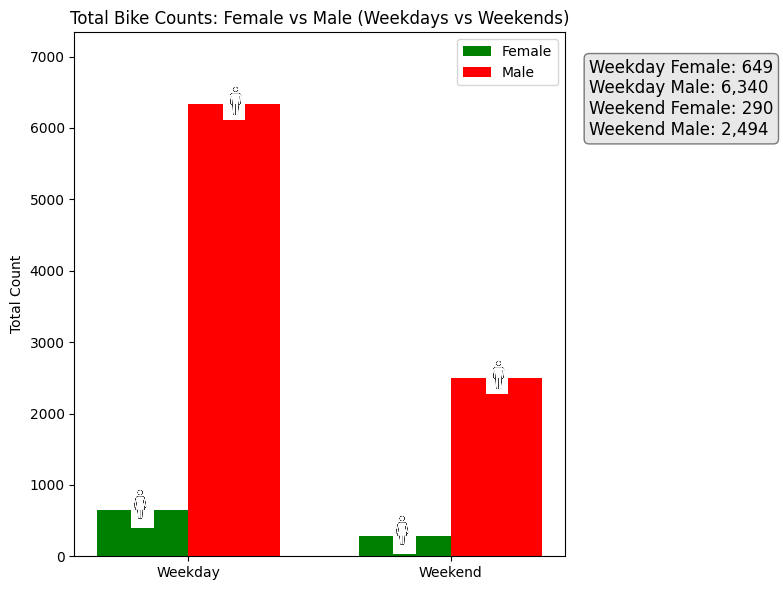

In [6]:

# Calculate total counts for female and male bikers
female_weekday_total = df['Bike_Weekday_Female'].sum()
male_weekday_total = df['Bike_Weekday_Male'].sum()
female_weekend_total = df['Bike_Weekend_Female'].sum()
male_weekend_total = df['Bike_Weekend_Male'].sum()

# Load the icons
female_icon_path = 'imageprint2.png'  # Adjust the path as needed
male_icon_path = 'imageprint1.png'    # Adjust the path as needed
female_icon = plt.imread(female_icon_path)
male_icon = plt.imread(male_icon_path)

# Function to add icons on top of bars
def add_image(icon, ax, x, y, zoom=0.2):
    imagebox = OffsetImage(icon, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Function to add total counts outside the graph
def add_corner_totals(ax, female_data, male_data):
    textstr = (f"Weekday Female: {female_data[0]:,.0f}\n"
               f"Weekday Male: {male_data[0]:,.0f}\n"
               f"Weekend Female: {female_data[1]:,.0f}\n"
               f"Weekend Male: {male_data[1]:,.0f}")
    props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

# Define the plotting function
def plot_bike_data_comparison(labels, female_data, male_data, title, female_icon, male_icon, female_color, male_color, zoom=0.15):
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of bars

    # Creating the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))  # Increased width for better spacing

    # Plotting bars for female and male data with custom colors
    female_bars = ax.bar(x - width/2, female_data, width, label='Female', color=female_color)
    male_bars = ax.bar(x + width/2, male_data, width, label='Male', color=male_color)

    # Adding icons on top of bars for both female and male
    for i in range(len(female_data)):
        add_image(female_icon, ax, x[i] - width/2, female_data[i] + 50, zoom=zoom)
        add_image(male_icon, ax, x[i] + width/2, male_data[i] + 50, zoom=zoom)

    # Adding labels and title
    ax.set_ylabel('Total Count')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, max(max(female_data), max(male_data)) + 1000)  # Add some space above bars
    ax.legend()

    # Adding the total counts outside the graph
    add_corner_totals(ax, female_data, male_data)

    plt.tight_layout()
    plt.show()

# Calling the function for a combined graph
plot_bike_data_comparison(
    labels=['Weekday', 'Weekend'],
    female_data=[female_weekday_total, female_weekend_total],
    male_data=[male_weekday_total, male_weekend_total],
    title='Total Bike Counts: Female vs Male (Weekdays vs Weekends)',
    female_icon=female_icon,
    male_icon=male_icon,
    female_color='green',   # Color for females
    male_color='red'    # Color for males
)


### Total counts for Bike_Weekday_Helmet and Bike_Weekend_Helmet

In [7]:

# Calculate total counts for Bike_Weekday_Helmet and Bike_Weekend_Helmet
total_weekday_helmet_count = df['Bike_Weekday_Helmet'].sum()
total_weekend_helmet_count = df['Bike_Weekend_Helmet'].sum()

# Step 2: Create a table for total helmet counts on weekdays and weekends
helmet_counts_data = {
    'Category': ['Weekday Helmets', 'Weekend Helmets'],
    'Total Count': [total_weekday_helmet_count, total_weekend_helmet_count]
}

helmet_counts_df = pd.DataFrame(helmet_counts_data)

# Display the table using tabulate for better visualization
print("\nBike Helmet Counts on Weekdays and Weekends:")
print(tabulate(helmet_counts_df, headers='keys', tablefmt='grid'))

# Optional: Save the table to CSV file
helmet_counts_df.to_csv('helmet_counts.csv', index=False)



Bike Helmet Counts on Weekdays and Weekends:
+----+-----------------+---------------+
|    | Category        |   Total Count |
+====+=================+===============+
|  0 | Weekday Helmets |          1601 |
+----+-----------------+---------------+
|  1 | Weekend Helmets |           865 |
+----+-----------------+---------------+


### Total counts for female and male scooter riders

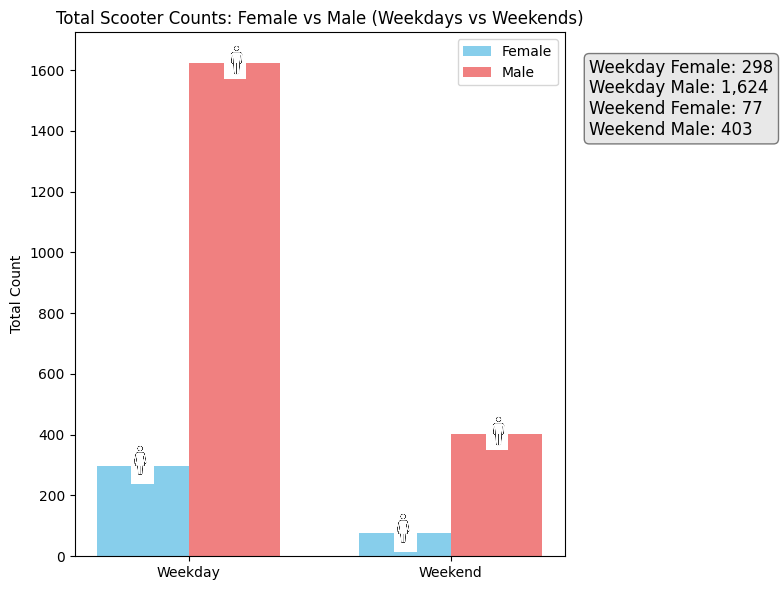

In [8]:

# Calculate total counts for female and male scooter riders
female_scooter_weekday_total = df['Scooter_Weekday_Female'].sum()
male_scooter_weekday_total = df['Scooter_Weekday_Male'].sum()
female_scooter_weekend_total = df['Scooter_Weekend_Female'].sum()
male_scooter_weekend_total = df['Scooter_Weekend_Male'].sum()

# Load the icons
female_icon_path = 'imageprint2.png'  # Adjust the path as needed
male_icon_path = 'imageprint1.png'    # Adjust the path as needed
female_icon = plt.imread(female_icon_path)
male_icon = plt.imread(male_icon_path)

# Function to add icons on top of bars
def add_image(icon, ax, x, y, zoom=0.2):
    imagebox = OffsetImage(icon, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Function to add total counts outside the graph
def add_corner_totals(ax, female_data, male_data):
    textstr = (f"Weekday Female: {female_data[0]:,.0f}\n"
               f"Weekday Male: {male_data[0]:,.0f}\n"
               f"Weekend Female: {female_data[1]:,.0f}\n"
               f"Weekend Male: {male_data[1]:,.0f}")
    props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

# Define the plotting function for scooters
def plot_scooter_data_comparison(labels, female_data, male_data, title, female_icon, male_icon, female_color, male_color, zoom=0.15):
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of bars

    # Creating the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))  # Increased width for better spacing

    # Plotting bars for female and male data with custom colors
    female_bars = ax.bar(x - width/2, female_data, width, label='Female', color=female_color)
    male_bars = ax.bar(x + width/2, male_data, width, label='Male', color=male_color)

    # Adding icons on top of bars for both female and male
    for i in range(len(female_data)):
        add_image(female_icon, ax, x[i] - width/2, female_data[i] + 10, zoom=zoom)
        add_image(male_icon, ax, x[i] + width/2, male_data[i] + 10, zoom=zoom)

    # Adding labels and title
    ax.set_ylabel('Total Count')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, max(max(female_data), max(male_data)) + 100)  # Add some space above bars
    ax.legend()

    # Adding the total counts outside the graph
    add_corner_totals(ax, female_data, male_data)

    plt.tight_layout()
    plt.show()

# Calling the function for a combined graph for scooters
plot_scooter_data_comparison(
    labels=['Weekday', 'Weekend'],
    female_data=[female_scooter_weekday_total, female_scooter_weekend_total],
    male_data=[male_scooter_weekday_total, male_scooter_weekend_total],
    title='Total Scooter Counts: Female vs Male (Weekdays vs Weekends)',
    female_icon=female_icon,
    male_icon=male_icon,
    female_color='skyblue',   # Color for females
    male_color='lightcoral'    # Color for males
)


### Top 10 locations with more pedestrian walking counts (Total, Female, Male)

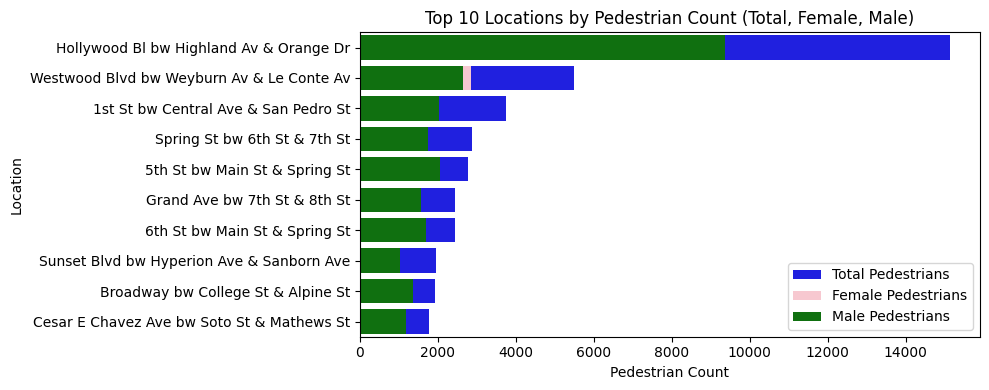

                      Full Location Names 2023  Ped_Total  Ped_Female_Total  \
29     Hollywood Bl bw Highland Av & Orange Dr      15152              5785   
74   Westwood Blvd bw Weyburn Av & Le Conte Av       5492              2849   
0         1st St bw Central Ave & San Pedro St       3745              1716   
57                Spring St bw 6th St & 7th St       2867              1111   
4                5th St bw Main St & Spring St       2768               713   
26                Grand Ave bw 7th St & 8th St       2442               870   
5                6th St bw Main St & Spring St       2428               728   
59   Sunset Blvd bw Hyperion Ave & Sanborn Ave       1940               911   
11          Broadway bw College St & Alpine St       1923               564   
15  Cesar E Chavez Ave bw Soto St & Mathews St       1773               584   

    Ped_Male_Total  
29            9367  
74            2643  
0             2029  
57            1756  
4             2055  
26  

In [9]:

top_10_pedestrian_locs = df[['Full Location Names 2023', 'Ped_Total', 'Ped_Female_Total', 'Ped_Male_Total']].nlargest(10, 'Ped_Total')

# Plot for the top 10 pedestrian locations
plt.figure(figsize=(10, 4))
sns.barplot(x='Ped_Total', y='Full Location Names 2023', data=top_10_pedestrian_locs, label='Total Pedestrians', color='b')
sns.barplot(x='Ped_Female_Total', y='Full Location Names 2023', data=top_10_pedestrian_locs, label='Female Pedestrians', color='pink')
sns.barplot(x='Ped_Male_Total', y='Full Location Names 2023', data=top_10_pedestrian_locs, label='Male Pedestrians', color='green')

plt.title('Top 10 Locations by Pedestrian Count (Total, Female, Male)')
plt.xlabel('Pedestrian Count')
plt.ylabel('Location')
plt.legend()
plt.tight_layout()
plt.show()

# Print the top 10 locations with more pedestrian walking counts
print(top_10_pedestrian_locs)

### Location with more bikes (Total, Female, Male)

C:\Users\rahul\AppData\Local\Temp\ipykernel_12060\2384499996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Total', 'Female', 'Male'],


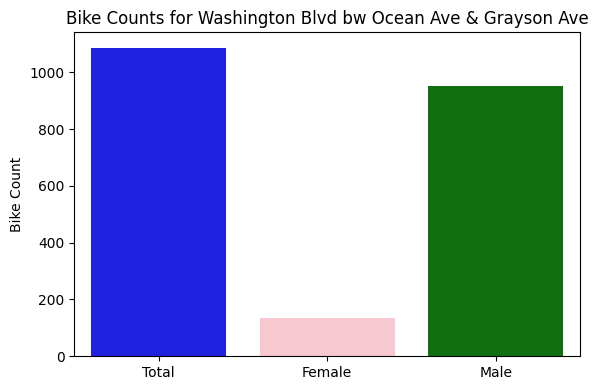

                      Full Location Names 2023  Bike_Total  Bike_Female_Total  \
71  Washington Blvd bw Ocean Ave & Grayson Ave        1086                133   

    Bike_Male_Total  
71              953  


In [10]:

max_bike_loc = df[['Full Location Names 2023', 'Bike_Total', 'Bike_Female_Total', 'Bike_Male_Total']].nlargest(1, 'Bike_Total')

# Plot for the bike counts by gender for the location with the most bikes
plt.figure(figsize=(6, 4))
sns.barplot(x=['Total', 'Female', 'Male'], 
            y=[max_bike_loc['Bike_Total'].values[0], max_bike_loc['Bike_Female_Total'].values[0], max_bike_loc['Bike_Male_Total'].values[0]], 
            palette=['b', 'pink', 'green'])

plt.title(f"Bike Counts for {max_bike_loc['Full Location Names 2023'].values[0]}")
plt.ylabel('Bike Count')
plt.tight_layout()
plt.show()

# Print the location with the most bike counts
print(max_bike_loc)

### Top 10 locations by Facility Type

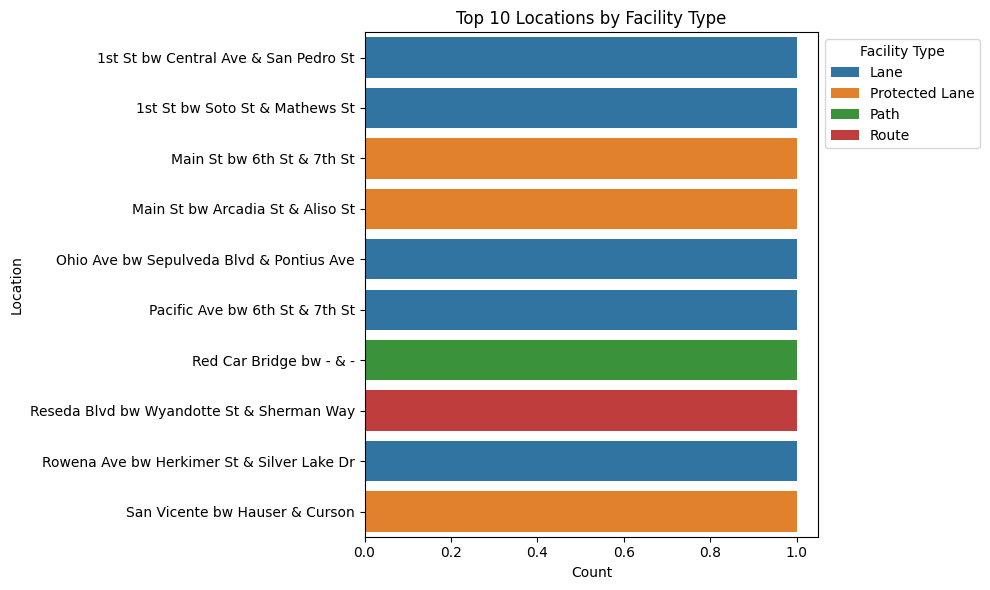

                     Full Location Names 2023   Facility Type  Count
0        1st St bw Central Ave & San Pedro St            Lane      1
1              1st St bw Soto St & Mathews St            Lane      1
2                  Main St bw 6th St & 7th St  Protected Lane      1
3            Main St bw Arcadia St & Aliso St  Protected Lane      1
4    Ohio Ave bw Sepulveda Blvd & Pontius Ave            Lane      1
5              Pacific Ave bw 6th St & 7th St            Lane      1
6                     Red Car Bridge bw - & -            Path      1
7   Reseda Blvd bw Wyandotte St & Sherman Way           Route      1
8  Rowena Ave bw Herkimer St & Silver Lake Dr            Lane      1
9              San Vicente bw Hauser & Curson  Protected Lane      1


In [11]:

top_10_facility_type = df[['Full Location Names 2023', 'Facility Type']].value_counts().nlargest(10).reset_index(name='Count')

# Plot for the top 10 locations by Facility Type with dodge=True to prevent overlapping
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Full Location Names 2023', hue='Facility Type', data=top_10_facility_type)

plt.title('Top 10 Locations by Facility Type')
plt.xlabel('Count')
plt.ylabel('Location')

# Adjust the legend position to avoid overlapping
plt.legend(title='Facility Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Print the top 10 locations by Facility Type
print(top_10_facility_type)


### Location Analysis - Total pedestrian, bike and scooter counts by top 10 location

In [13]:
# Function to generate random coordinates around Los Angeles (for demonstration)
def generate_random_coordinates(center_lat=34.0522, center_lng=-118.2437, radius=0.02):
    random_lat = center_lat + (random.uniform(-1, 1) * radius)
    random_lng = center_lng + (random.uniform(-1, 1) * radius)
    return (random_lat, random_lng)

# Function to create a map for the top 10 locations with numbered circular markers and list the names beside the map
def create_map(df, category_column, category_name):
    # Sort data by the specified category and select the top 10 locations
    top_10 = df[['Full Location Names 2023', category_column]].sort_values(by=category_column, ascending=False).head(10)
    
    # Create a smaller base map
    map_center = [34.0522, -118.2437]  # Los Angeles coordinates
    map_top_10 = folium.Map(location=map_center, zoom_start=12, width='300px', height='300px')
    
    # Add numbered markers for each top location with random coordinates for demonstration
    for i, (index, row) in enumerate(top_10.iterrows(), start=1):
        coordinates = generate_random_coordinates()  # Generate random coordinates
        
        # Create a custom icon with the number styled as a circular background
        folium.Marker(
            location=coordinates,
            popup=f"{row['Full Location Names 2023']}: {row[category_column]}",
            icon=folium.DivIcon(
                icon_size=(30, 30),
                icon_anchor=(15, 15),
                html=f'''
                    <div style="
                        width: 30px; 
                        height: 30px; 
                        border-radius: 15px; 
                        background-color: red; 
                        color: white; 
                        font-weight: bold; 
                        text-align: center; 
                        line-height: 30px;">
                        {i}
                    </div>
                ''',
            )
        ).add_to(map_top_10)

    # Generate HTML list of location names with counts
    location_list_html = "<ul style='padding-left: 0;'>"
    for i, (index, row) in enumerate(top_10.iterrows(), start=1):
        location_list_html += f"<li style='list-style-type: none;'><strong>{i}.</strong> {row['Full Location Names 2023']}: {row[category_column]}</li>"
    location_list_html += "</ul>"

    return map_top_10._repr_html_(), location_list_html  # Return HTML map and location list

# Generate and display maps with location names for pedestrians, bikers, and scooters
maps_html = """
<div style="display: flex; justify-content: space-around;">
    <div>
        <h4>Top 10 Pedestrian Locations</h4>
        {pedestrian_map}
        <div>{pedestrian_list}</div>
    </div>
    <div>
        <h4>Top 10 Biker Locations</h4>
        {biker_map}
        <div>{biker_list}</div>
    </div>
    <div>
        <h4>Top 10 Scooter Locations</h4>
        {scooter_map}
        <div>{scooter_list}</div>
    </div>
</div>
"""

# Replace placeholders with the generated maps and lists
pedestrian_map, pedestrian_list = create_map(df, 'Ped_Total', 'pedestrians')
biker_map, biker_list = create_map(df, 'Bike_Total', 'bikers')
scooter_map, scooter_list = create_map(df, 'Scooter_Total', 'scooters')

html_output = maps_html.format(
    pedestrian_map=pedestrian_map,
    pedestrian_list=pedestrian_list,
    biker_map=biker_map,
    biker_list=biker_list,
    scooter_map=scooter_map,
    scooter_list=scooter_list
)

# Display the maps and lists in a single view
display(HTML(html_output))


### Summary statistics for pedestrians and bikes

In [14]:
# Group the data by location and calculate summary statistics for pedestrians and bikes
summary_stats = df.groupby('Full Location Names 2023').agg({
    'Ped_Total': ['mean', 'median', 'max', 'min', 'std'],
    'Bike_Total': ['mean', 'median', 'max', 'min', 'std'],
    'Ped_Female_Total': ['mean', 'median', 'max', 'min', 'std'],
    'Ped_Male_Total': ['mean', 'median', 'max', 'min', 'std'],
    'Bike_Female_Total': ['mean', 'median', 'max', 'min', 'std'],
    'Bike_Male_Total': ['mean', 'median', 'max', 'min', 'std']
}).reset_index()

# Rename the columns for better readability
summary_stats.columns = ['Full Location Name', 'Ped Mean', 'Ped Median', 'Ped Max', 'Ped Min', 'Ped Std',
                         'Bike Mean', 'Bike Median', 'Bike Max', 'Bike Min', 'Bike Std',
                         'Ped Female Mean', 'Ped Female Median', 'Ped Female Max', 'Ped Female Min', 'Ped Female Std',
                         'Ped Male Mean', 'Ped Male Median', 'Ped Male Max', 'Ped Male Min', 'Ped Male Std',
                         'Bike Female Mean', 'Bike Female Median', 'Bike Female Max', 'Bike Female Min', 'Bike Female Std',
                         'Bike Male Mean', 'Bike Male Median', 'Bike Male Max', 'Bike Male Min', 'Bike Male Std']

# Step 2: Display the summary statistics
print(summary_stats)

# Save the summary statistics to a CSV file (optional)
summary_stats.to_csv('location_summary_statistics.csv', index=False)

                              Full Location Name  Ped Mean  Ped Median  \
0           1st St bw Central Ave & San Pedro St    3745.0      3745.0   
1                 1st St bw Soto St & Mathews St     674.0       674.0   
2            4th St bw Rossmore Ave & Arden Blvd     304.0       304.0   
3           54th St bw Gramercy Pl & Ruthelen St     146.0       146.0   
4                  5th St bw Main St & Spring St    2768.0      2768.0   
..                                           ...       ...         ...   
74     Westwood Blvd bw Weyburn Av & Le Conte Av    5492.0      5492.0   
75         Wilmington Ave bw 112th St & 111th St     338.0       338.0   
76    Wilshire Blvd bw Manhattan Pl & Western Av    1186.0      1186.0   
77  Wilshire Blvd bw Manning Ave & Westholme Ave     332.0       332.0   
78                  York Blvd bw Ave 50 & Ave 51    1744.0      1744.0   

    Ped Max  Ped Min  Ped Std  Bike Mean  Bike Median  Bike Max  Bike Min  \
0      3745     3745      NaN     